In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("su-d-01.01-vz1850-ge-01.csv", sep=";",encoding='unicode_escape')
df.head()

,Jahr,Gemeindenummer,Gemeindename,Bezirksnummer,Bezirksname,Kantonsnummer,Kanton,Kantonsname,Zähleinheit,Anzahl
0,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Einwohnerinnen und Einwohner - Total,647.0
1,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,646.0
2,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Ausland,1.0
3,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Geschlecht - Mann,320.0
4,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Geschlecht - Frau,327.0


In [22]:
def colInfo(df, column):
  print("Column: "+column)
  total = len(df.values)
  print(f"Number of unique values: {len(df[column].unique())}")
  
  return None

_ = [colInfo(df, c) for c in ['Jahr', 'Gemeindename', 'Bezirksname', 'Kantonsname', 'Zähleinheit']]

Column: Jahr
Number of unique values: 18
Column: Gemeindename
Number of unique values: 3623
Column: Bezirksname
Number of unique values: 242
Column: Kantonsname
Number of unique values: 26
Column: Zähleinheit
Number of unique values: 53


In [39]:
df['Zähleinheit'].value_counts()

Staatsangehörigkeit - Ausland                   54793
Staatsangehörigkeit - Schweiz                   54793
Religion - Reformiert                           49885
Religion - Katholisch                           49885
Religion - Andere Religion                      49885
Sprache - Nichtlandessprache                    40278
Sprache - Französisch                           40278
Sprache - Rätoromanisch                         40278
Sprache - Italienisch                           40278
Sprache - Deutsch                               40278
Wohnbevölkerung - Total                         37088
Alter - 0-14 Jahre                              29419
Geschlecht - Frau                               28564
Geschlecht - Mann                               28564
Alter - 65 Jahre und mehr                       26229
Geschlecht / Alter - Mann, 40-59 Jahre          26229
Geschlecht / Alter - Mann, 15-19 Jahre          26229
Alter - 20-39 Jahre                             26229
Geschlecht / Alter - Frau, 6

In [34]:
total_EinwohnerSchweizAusl = df[(df["Zähleinheit"] == 'Staatsangehörigkeit - Schweiz') | (df["Zähleinheit"] == 'Staatsangehörigkeit - Ausland')]
total_EinwohnerSchweiz = df[df["Zähleinheit"] == 'Staatsangehörigkeit - Schweiz']
total_EinwohnerSchweiz.head()

,Jahr,Gemeindenummer,Gemeindename,Bezirksnummer,Bezirksname,Kantonsnummer,Kanton,Kantonsname,Zähleinheit,Anzahl
1,1850,1,Aeugst,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,646.0
9,1850,2,Affoltern am Albis,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,1839.0
17,1850,3,Bonstetten,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,873.0
25,1850,4,Hausen,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,1440.0
33,1850,5,Hedingen,101,Affoltern,1,ZH,Zürich,Staatsangehörigkeit - Schweiz,992.0


In [24]:
Schweizer_pro_Jahr = total_EinwohnerSchweiz.groupby(['Jahr'])['Anzahl'].sum().reset_index()

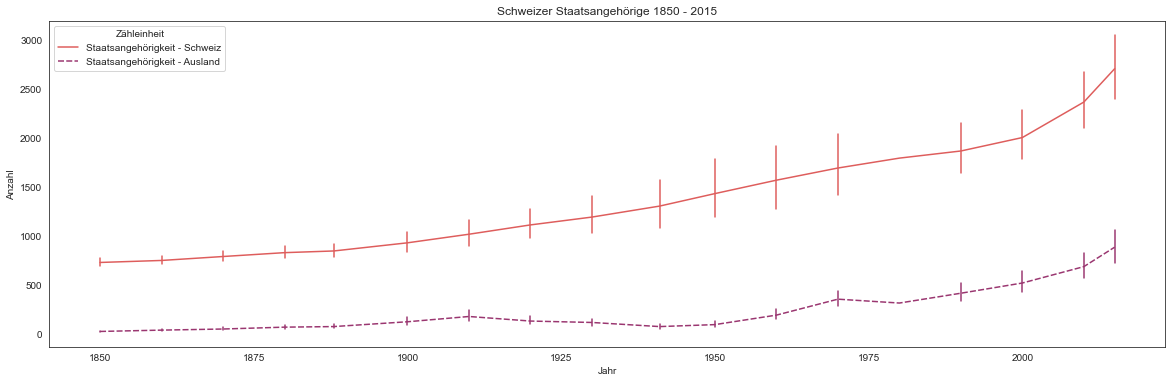

In [70]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Schweizer Staatsangehörige 1850 - 2015')
sns.set_style('white')
sns.lineplot(data=total_EinwohnerSchweizAusl, x="Jahr", y="Anzahl",hue='Zähleinheit',style='Zähleinheit',err_style="bars",
     palette="flare")
plt.show()

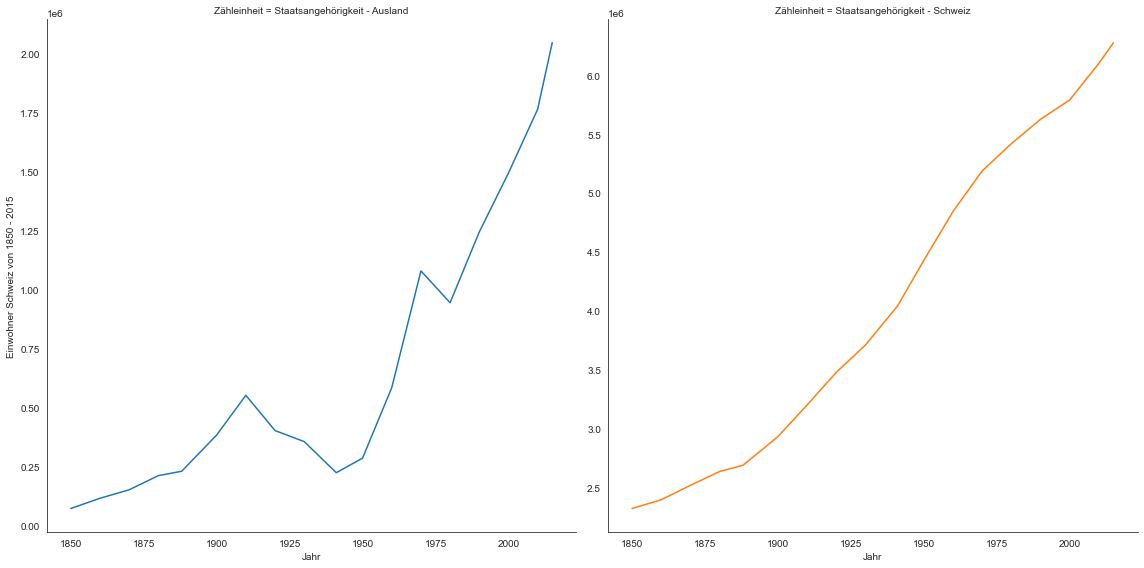

In [66]:
Schweizer_pro_Jahr_pro_Kanton = total_EinwohnerSchweizAusl.groupby(['Jahr','Zähleinheit'])['Anzahl'].sum().reset_index()

graphGDP = sns.FacetGrid(Schweizer_pro_Jahr_pro_Kanton, col="Zähleinheit", col_wrap=2,
                      hue = "Zähleinheit", sharey = False, height=8)

graphGDP = (graphGDP.map(sns.lineplot,"Jahr","Anzahl")
         .set_axis_labels("Jahr","Einwohner Schweiz von 1850 - 2015"))

graphGDP;


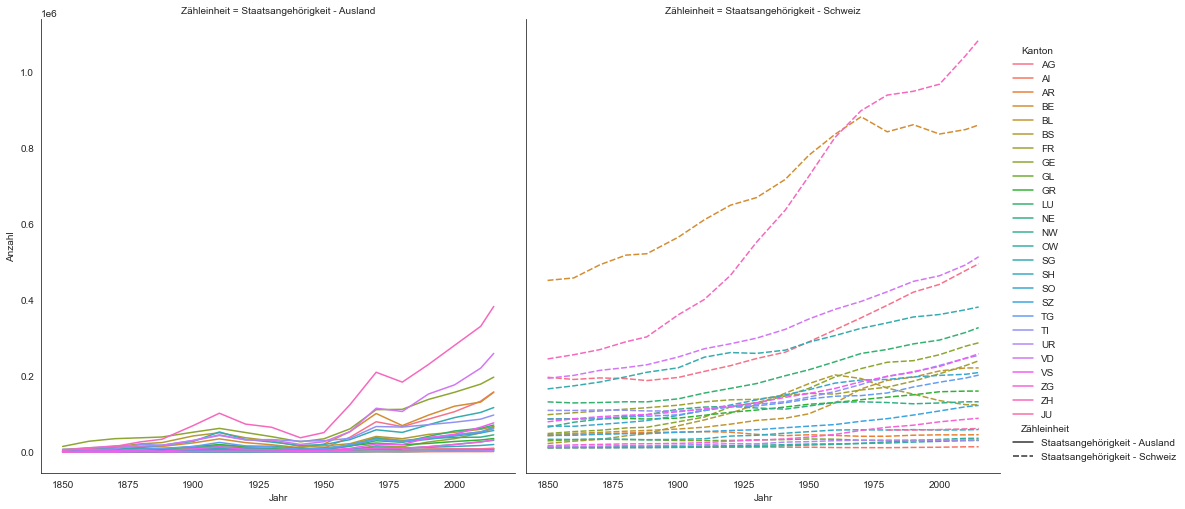

In [80]:
Schweizer_pro_Jahr_pro_Kanton = total_EinwohnerSchweizAusl.groupby(['Jahr','Zähleinheit','Kanton'])['Anzahl'].sum().reset_index()
sns.relplot(
    data=Schweizer_pro_Jahr_pro_Kanton, x="Jahr", y="Anzahl",
    col="Zähleinheit", hue="Kanton", style="Zähleinheit",
    kind="line", height=7
)

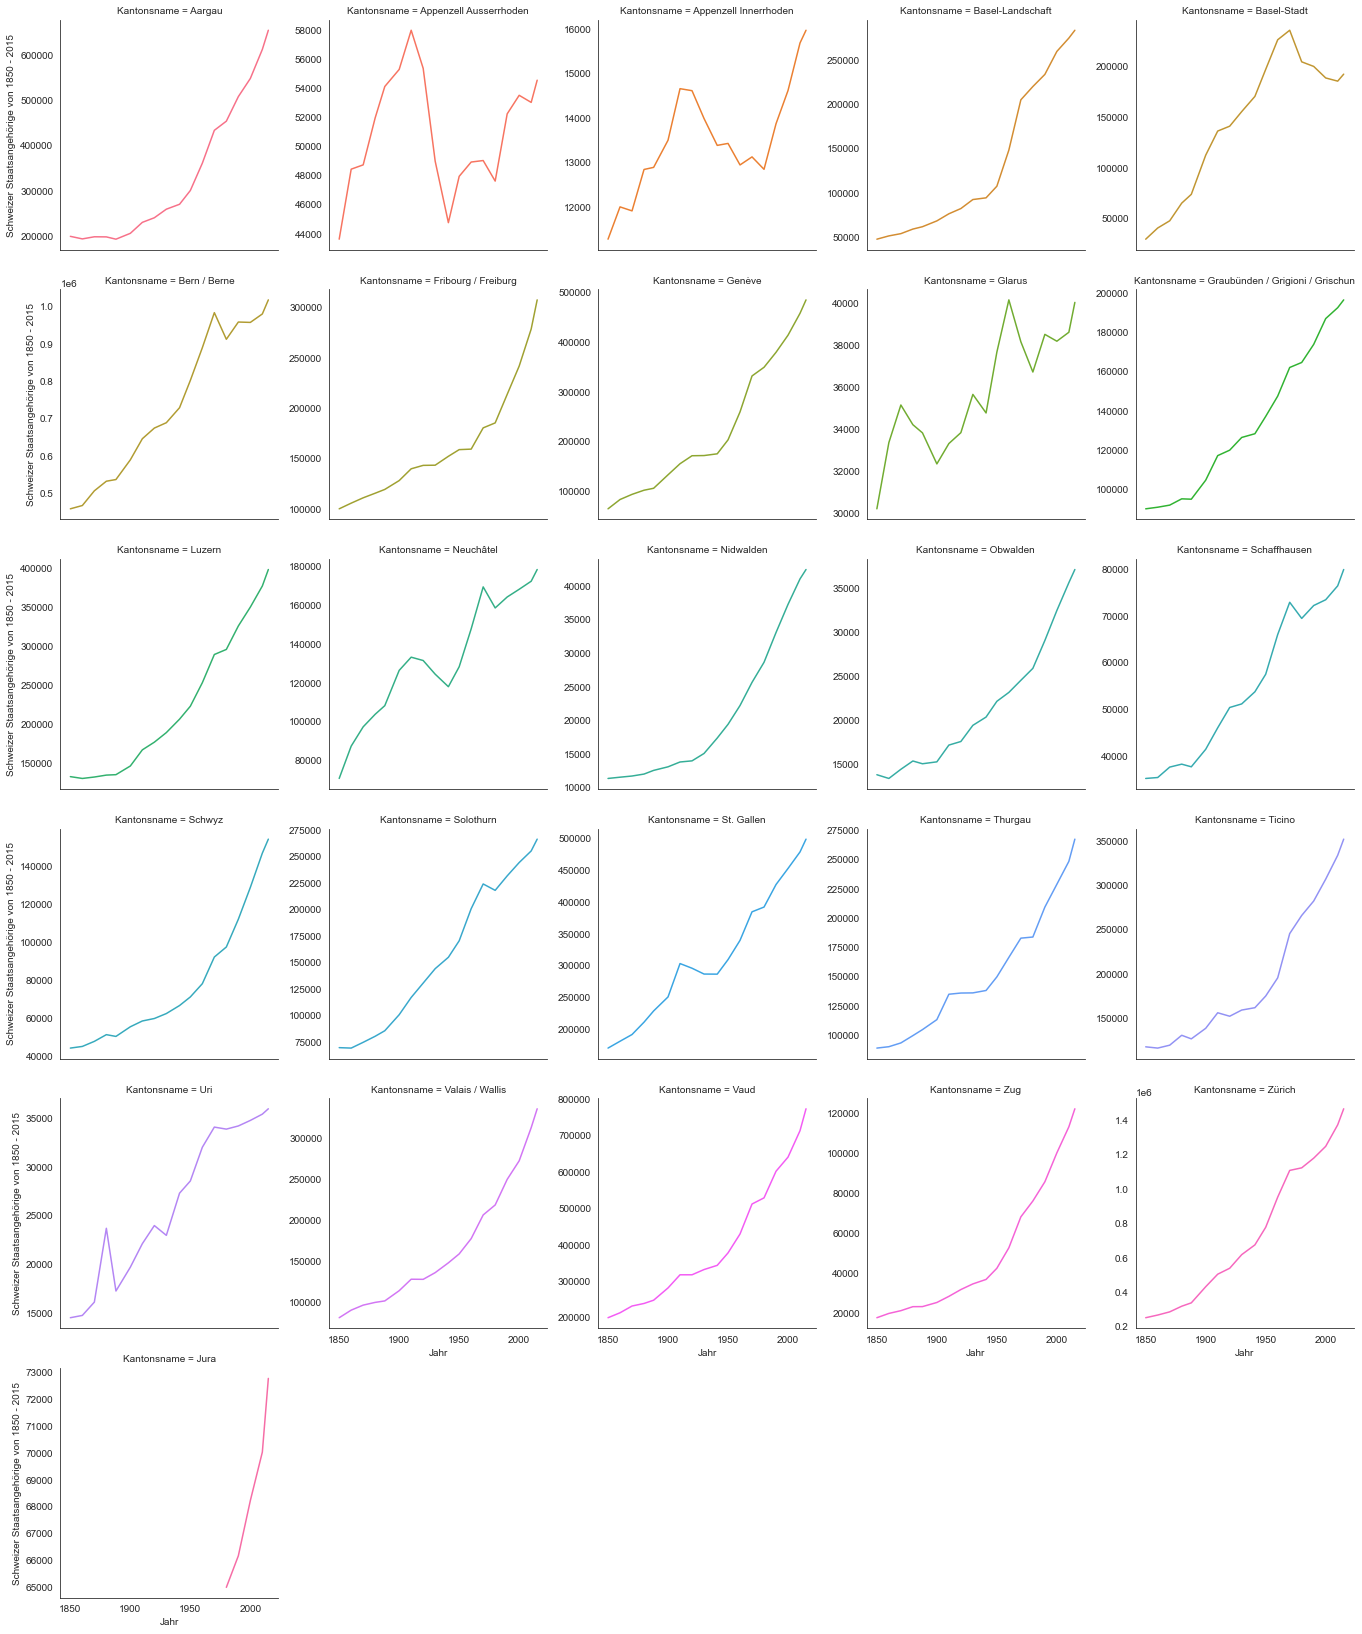

In [76]:
Auslaender_pro_Jahr_pro_Kanton = total_EinwohnerSchweizAusl.groupby(['Jahr','Kantonsname'])['Anzahl'].sum().reset_index()

graphGDP = sns.FacetGrid(Auslaender_pro_Jahr_pro_Kanton, col="Kantonsname", col_wrap=5,
                      hue = "Kantonsname", sharey = False, height=3.8)

graphGDP = (graphGDP.map(sns.lineplot,"Jahr","Anzahl")
         .set_axis_labels("Jahr","Schweizer Staatsangehörige von 1850 - 2015"))

graphGDP;